In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from picconfig import phedefpath, phecodespath, phecatpath, eventpath, temppath
import seaborn as sns

In [3]:
phe=pd.read_csv(phedefpath)[['phecode','phenotype','category']].to_numpy()
f=pd.read_csv(phecodespath).to_numpy()
phecodes=np.concatenate(f)
pheexplain={}
for i in phe:
    code,des,cat=i
    pheexplain[code]=(des,cat)
phex=np.array(list(pheexplain.values()))

In [4]:
colors = ['#BA41B6','#403990','#80A6E2','#50A651','#FBDD85','#F46F43','#CF3D3E']
n = 30
cm = LinearSegmentedColormap.from_list('Nature', colors, N=n)
colorlist = [cm(i) for i in range(n)]
pallete = sns.color_palette(colorlist)
color = ['#403990','#80A6E2','#FBDD85','#F46F43','#CF3D3E']

In [5]:
pallete

[(0.7294117647058823, 0.2549019607843137, 0.7137254901960784),
 (0.6304259634888438, 0.24841108857336036, 0.68289384719405),
 (0.5314401622718052, 0.24192021636240701, 0.6520622041920217),
 (0.4324543610547667, 0.2354293441514537, 0.6212305611899932),
 (0.33346855983772816, 0.22893847194050035, 0.5903989181879649),
 (0.25963488843813387, 0.2382691007437458, 0.5757944557133198),
 (0.31156186612576064, 0.3267072346179852, 0.6423258958755916),
 (0.3634888438133874, 0.4151453684922245, 0.7088573360378634),
 (0.4154158215010142, 0.5035835023664639, 0.7753887762001352),
 (0.467342799188641, 0.5920216362407033, 0.8419202163624071),
 (0.4889790398918188, 0.6509803921568628, 0.8470588235294116),
 (0.4500338066260987, 0.6509803921568628, 0.7294117647058822),
 (0.41108857336037863, 0.6509803921568628, 0.6117647058823529),
 (0.37214334009465855, 0.6509803921568628, 0.4941176470588235),
 (0.3331981068289385, 0.6509803921568628, 0.3764705882352942),
 (0.3830966869506426, 0.673292765382015, 0.3387423935091278),
 (0.5218390804597701, 0.7179175118323191, 0.3809330628803246),
 (0.660581473968898, 0.7625422582826235, 0.42312373225152133),
 (0.7993238674780259, 0.8071670047329278, 0.4653144016227181),
 (0.9380662609871535, 0.851791751183232, 0.5075050709939148),
 (0.98052738336714, 0.8071670047329276, 0.48586883029073696),
 (0.9748478701825557, 0.717917511832319, 0.4323191345503718),
 (0.9691683569979715, 0.6286680189317104, 0.3787694388100067),
 (0.9634888438133874, 0.539418526031102, 0.3252197430696415),
 (0.9578093306288032, 0.4501690331304934, 0.27167004732927647),
 (0.9318458417849899, 0.4014874915483434, 0.2593644354293442),
 (0.9018255578093306, 0.36091954022988504, 0.2553076402974983),
 (0.8718052738336713, 0.3203515889114266, 0.2512508451656525),
 (0.8417849898580123, 0.2797836375929683, 0.24719405003380665),
 (0.8117647058823529, 0.23921568627450981, 0.24313725490196078)]

In [6]:
allphe = np.array(phe[:,0],dtype=float)

In [7]:
phecat=np.load(phecatpath,allow_pickle=True)[0]

In [8]:
overall_index = np.concatenate(list(phecat.values()))

In [9]:
ycount=np.load(eventpath)

In [10]:
labelcorr=np.zeros((ycount.shape[1],ycount.shape[1]))

In [11]:
import os
if 'corrmtx.npy' in os.listdir(os.getcwd()):
    corrmtx = np.load('corrmtx.npy')
else:
    for i in ycount:
        index = np.where(i==1)[0]
        for u in index:
            for v in index:
                labelcorr[v,u]+=1
    corrmtx=labelcorr
    np.save('corrmtx.npy', corrmtx)

In [12]:
X_tsne_prediction = np.load("tsne_prediction.npy")

In [13]:
# center = np.array([19,-25])
center = np.array([-26,1])
r = 3
corridx = np.where(np.sum((X_tsne_prediction-center) ** 2, axis=1) < r ** 2)[0]
corridx = np.intersect1d(corridx, overall_index)
focusmtx=corrmtx[:,corridx][corridx,:]

In [14]:
focusmtx.shape

(14, 14)

In [15]:
dotsize=[]
for i in ycount.T:
    dotsize.append(np.sqrt(np.sum(i==1)))
dotsize=np.array(dotsize)

In [16]:
def plot_connected_points(nums, line_widths, index):
    line_widths = 600*line_widths/np.max(line_widths)
    codes = phecodes[index]
    names = []
    for code in codes:
        loc = np.where(allphe == code)[0][0]
        names.append(phe[loc,1])
    # print(names)
    keys = []
    for idx in index:
        for key, value in phecat.items():
            if idx in value:
                keys.append(key)
                break
    keys = np.array(keys)
    uniqkeys = np.unique(keys)
    # colors = ['#403990','#80A6E2','#FBDD85','#CF3D3E']
    colors = [pallete[12],'#63615a',color[3],color[3]]
    cm = LinearSegmentedColormap.from_list('Nature', colors, N=len(uniqkeys))
    dictionary = {}
    for i,key in enumerate(uniqkeys):
        dictionary[key] = cm(i)

    sizes = 9*np.sqrt(nums)
    plt.figure(figsize=(12, 12),dpi=100)
    ax = plt.gca()
    ax.set_xlim(-1.4,1.6)
    ax.set_ylim(-1.4,1.4)
    ax.set_aspect('equal')
    n=len(nums)
    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
    radius=1.2
    if n % 2 == 0:
        x, y = radius * np.cos(theta+ (15) * np.pi/(2*n)), radius * np.sin(theta+ (15) * np.pi/(2*n))
    else:
        x, y = radius * np.cos(theta+ 0.2*np.pi/(2*n)), radius * np.sin(theta+ 0.2*np.pi/(2*n))
    r = sizes/600
    flag1 = True
    for i in range(n):
        if y[i] == np.max(y):
            ax.text(x[i], y[i]+0.1, names[i], color='Black', ha='center', va='center', zorder=4, fontsize=18)
        elif y[i] == np.min(y):
            ax.text(x[i], y[i]-0.1, names[i], color='Black', ha='center', va='center', zorder=4 ,fontsize=18)
        elif x[i]>=0:
            ax.text(x[i], y[i], names[i], color='Black', ha='center', va='center', zorder=4, fontsize=18)
        else:
            ax.text(x[i], y[i], names[i], color='Black', ha='center', va='center', zorder=4, fontsize=18)
        try:
            c = plt.Circle((x[i], y[i]), r[i], color=dictionary[keys[i]], alpha=0.7, zorder=3)
            ax.add_patch(c)
        except:
            continue
        ax.add_patch(c)
    for i in range(n):
        for j in range(i, n-1):
            ax.plot([x[i], x[j]], [y[i], y[j]], color='gray', linewidth=line_widths[i, j], zorder=2,alpha=0.5)
    ax.axis('off')
    legend_handles=[]
    for i, key in enumerate(dictionary.keys()):
        legend_handles.append(Patch(color=cm(i), label=key,alpha=0.7))
    legend = plt.legend(handles=legend_handles,  bbox_to_anchor=(1, 0.1),ncol=1,fontsize=20,loc='upper left')
    legend.get_frame().set_linewidth(0)
    legend.get_frame().set_facecolor('none') 
    plt.tight_layout()

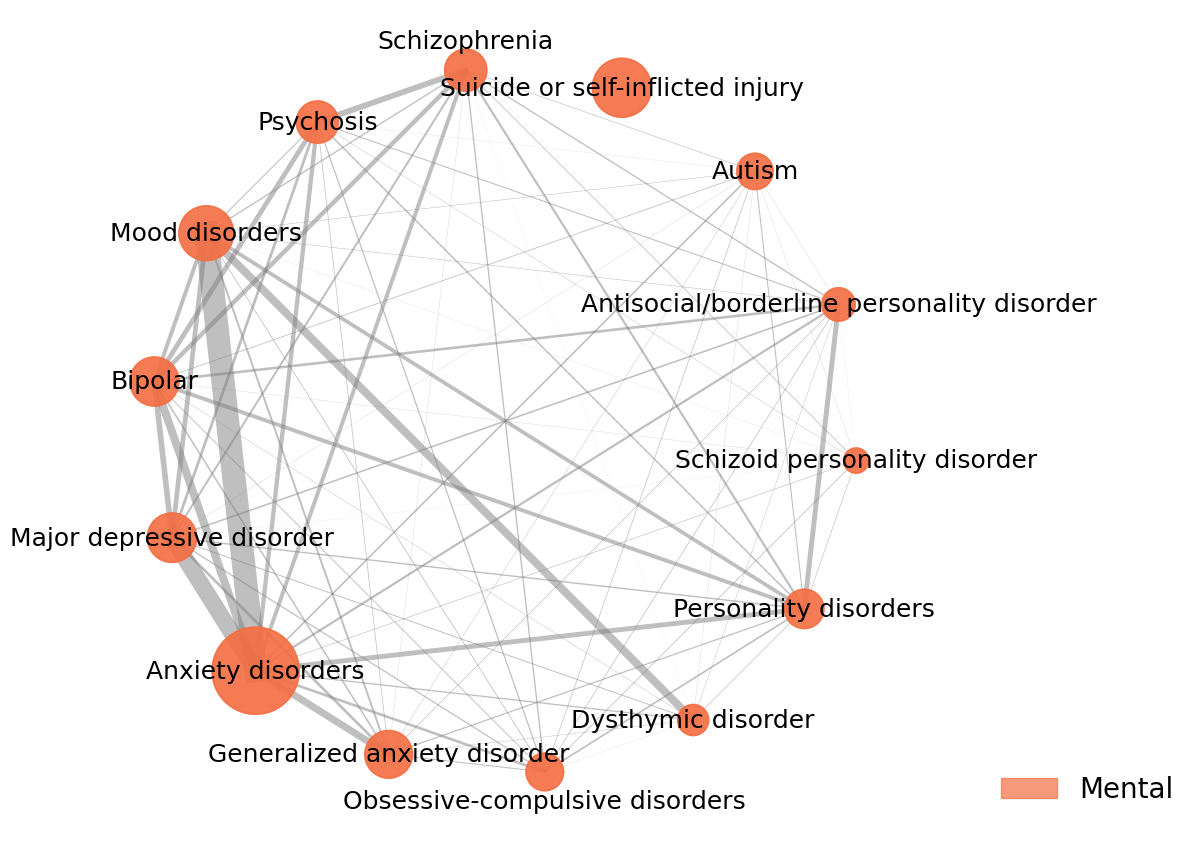

In [17]:
plot_connected_points(dotsize[corridx],focusmtx,corridx)
title = 'Network2'
plt.savefig(temppath + title+'.png', bbox_inches="tight")
plt.show()